dowload data

In [2]:
import yfinance as yf
import numpy as np

In [7]:
df = yf.download('MSFT', start='2009-12-31', end='2021-09-09')

[*********************100%%**********************]  1 of 1 completed


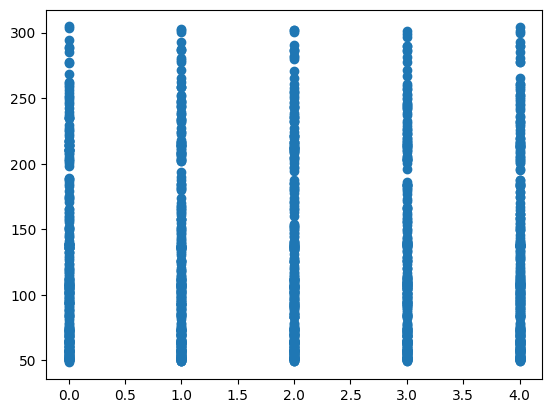

In [8]:
import matplotlib.pyplot as plt
df['returns'] = np.log(df.Close.pct_change() + 1)
df[['Close', 'returns']]
df['Day_Week'] = df.index.dayofweek
plt.scatter(df['Day_Week'], df['Close'])

In [64]:
def lagit(df, lags):
    names = []
    for i in range(1, lags+1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names


In [67]:
lagnames = lagit(df, 5)
df

,Open,High,Low,Close,Adj Close,Volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR,sma200
Date,,,,,,,,,,,,,,,,
2010-01-11,30.709999,30.760000,30.120001,30.270000,22.875517,68754700,NaN,NaN,NaN,NaN,NaN,NaN,-0.000635,-1,0.012802,NaN
2010-01-12,30.150000,30.400000,29.910000,30.070000,22.724367,65912100,-0.006629,NaN,NaN,NaN,NaN,NaN,0.002885,1,-0.006629,NaN
2010-01-13,30.260000,30.520000,30.010000,30.350000,22.935980,51863500,0.009269,-0.006629,NaN,NaN,NaN,NaN,0.002234,1,0.009269,NaN
2010-01-14,30.309999,31.100000,30.260000,30.959999,23.396959,63228100,0.019899,0.009269,-0.006629,NaN,NaN,NaN,-0.000505,-1,-0.019899,NaN
2010-01-15,31.080000,31.240000,30.709999,30.860001,23.321388,79913200,-0.003235,0.019899,0.009269,-0.006629,NaN,NaN,-0.001313,-1,0.003235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,302.869995,305.190002,301.489990,301.829987,294.780823,18983800,-0.000166,-0.005648,0.012829,0.002104,-0.009716,-0.002018,0.002323,1,-0.000166,248.91500
2021-09-02,302.200012,303.359985,300.179993,301.149994,294.116669,16285600,-0.002255,-0.000166,-0.005648,0.012829,0.002104,-0.009716,0.001124,1,-0.002255,249.33460
2021-09-03,300.989990,302.600006,300.260010,301.140015,294.106964,14747900,-0.000033,-0.002255,-0.000166,-0.005648,0.012829,0.002104,0.000602,1,-0.000033,249.76800


In [36]:
df.dropna(inplace=True)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
model.fit(df[lagnames], df['returns'])
df['returns']

Date
2010-01-11   -0.012802
2010-01-12   -0.006629
2010-01-13    0.009269
2010-01-14    0.019899
2010-01-15   -0.003235
                ...   
2021-09-01   -0.000166
2021-09-02   -0.002255
2021-09-03   -0.000033
2021-09-07   -0.003193
2021-09-08    0.000100
Name: returns, Length: 2936, dtype: float64

In [40]:
df['prediction_LR'] = model.predict(df[lagnames])
df['prediction_LR']

Date
2010-01-11   -0.000635
2010-01-12    0.002885
2010-01-13    0.002234
2010-01-14   -0.000505
2010-01-15   -0.001313
                ...   
2021-09-01    0.002323
2021-09-02    0.001124
2021-09-03    0.000602
2021-09-07    0.000761
2021-09-08    0.001483
Name: prediction_LR, Length: 2936, dtype: float64

In [41]:
df['direction_LR'] = [1 if i > 0 else-1 for i in df.prediction_LR]
df['direction_LR']

Date
2010-01-11   -1
2010-01-12    1
2010-01-13    1
2010-01-14   -1
2010-01-15   -1
             ..
2021-09-01    1
2021-09-02    1
2021-09-03    1
2021-09-07    1
2021-09-08    1
Name: direction_LR, Length: 2936, dtype: int64

In [42]:
df['strat_LR'] = df['direction_LR']*df['returns']
""" import matplotlib.pyplot as plt
particular_df = df.iloc[:, 11]
particular_df
y = df.iloc[:,10]

plt.scatter(particular_df, y) """

' import matplotlib.pyplot as plt\nparticular_df = df.iloc[:, 11]\nparticular_df\ny = df.iloc[:,10]\n\nplt.scatter(particular_df, y) '

In [43]:
np.exp(df[['returns', 'strat_LR']].sum())

returns      9.791585
strat_LR    41.763108
dtype: float64

<Axes: xlabel='Date'>

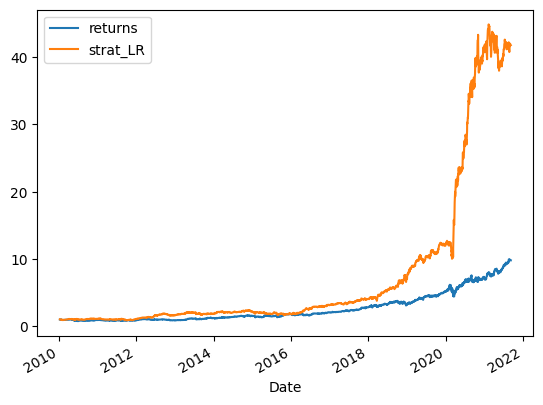

In [44]:
a = np.exp(df[['returns', 'strat_LR']].cumsum())
a.plot()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train,test = train_test_split(df, shuffle=False, test_size=0.3, random_state=0)

In [47]:
train = train.copy()

In [48]:
test = test.copy()

In [49]:
model = LinearRegression()

In [50]:
model.fit(train[lagnames], train['returns'])

LinearRegression()

In [51]:
test['prediction_LR'] = model.predict(test[lagnames])

In [52]:
test['direction_LR'] = [1 if i > 0 else -1 for i in test.prediction_LR]

In [53]:
test['strat_LR'] = test['direction_LR'] * test['returns']

In [54]:
np.exp(test[['returns', 'strat_LR']].sum())

returns     3.109695
strat_LR    3.359842
dtype: float64

<Axes: xlabel='Date'>

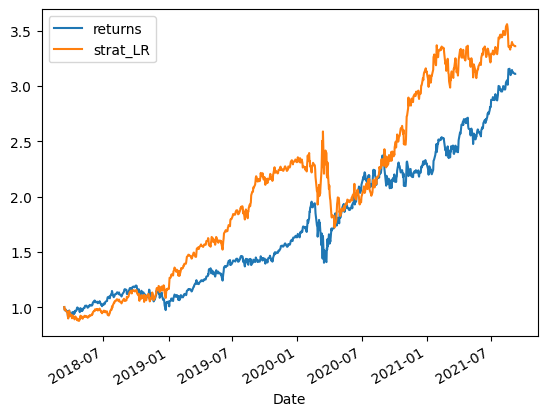

In [55]:
np.exp(test[['returns', 'strat_LR']].cumsum()).plot()

In [56]:
(test['direction_LR'].diff() != 0).value_counts()

direction_LR
False    626
True     255
Name: count, dtype: int64